## Ćwiczenie 1 - Filtracja sygnału EKG

### 1) Wczytanie sygnału EKG z zakłóceniami



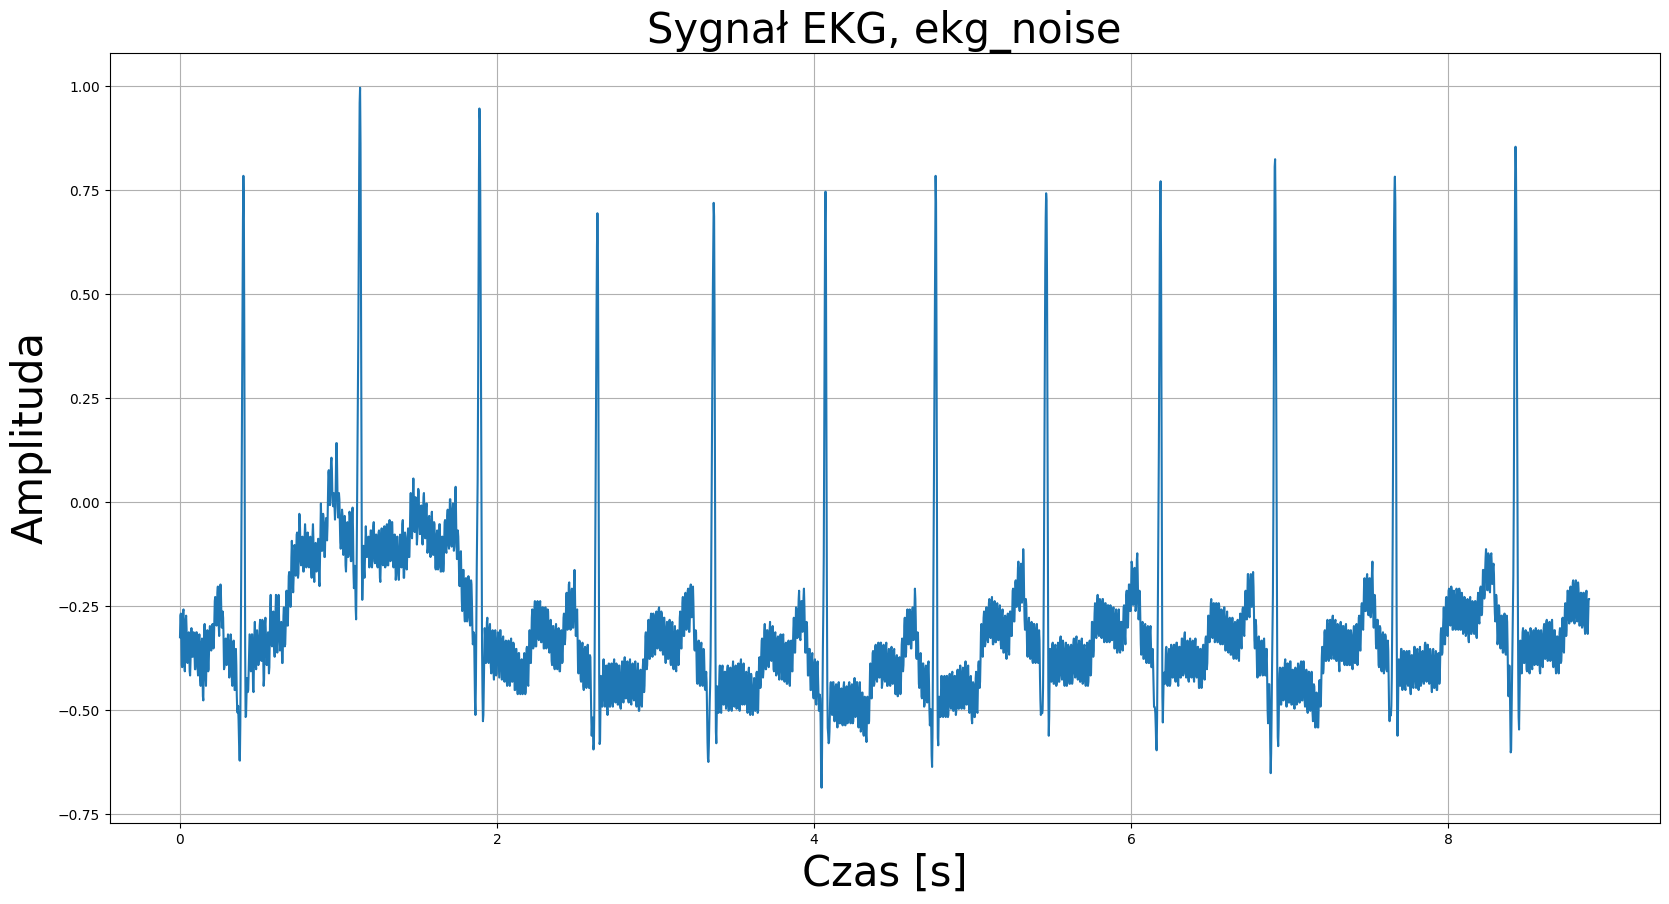

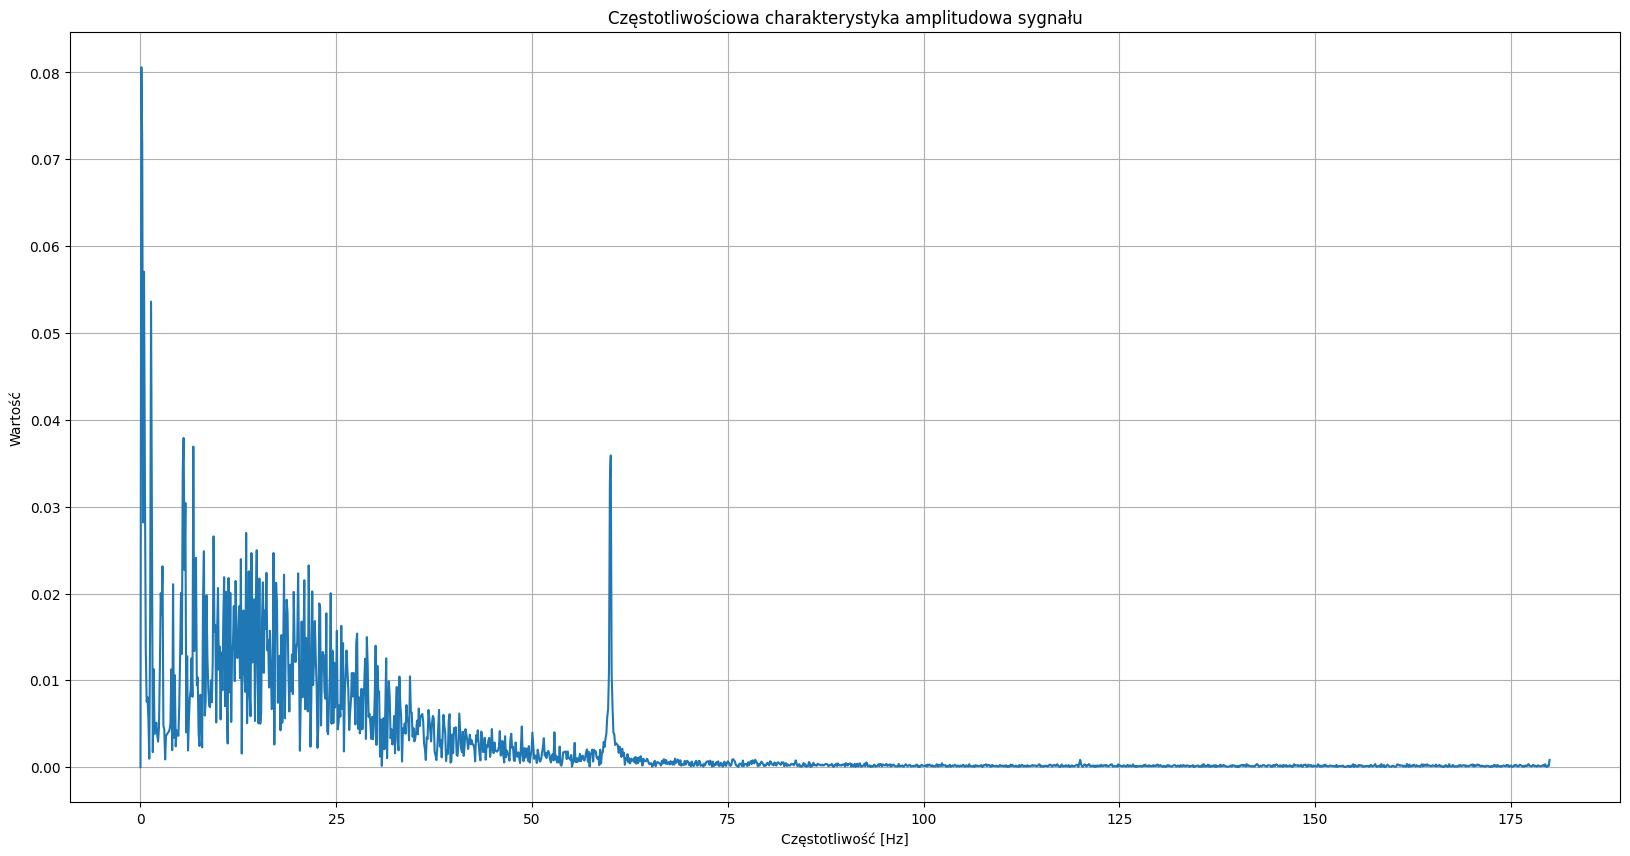

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def load_signal(filename):
    data = np.loadtxt(filename)

    # pierwsza kolumna to czas, a pozostałe to sygnały
    time = np.arange(len(data)) / fs
    signals = data[:, 1:]

    return time, signals

def visualize_signal(time, signal):
    plt.figure(figsize=(20, 10))
    plt.plot(time, signal)
    plt.title('Sygnał EKG, ekg_noise', fontsize=30)
    plt.xlabel('Czas [s]', fontsize=30)
    plt.ylabel('Amplituda', fontsize=30)
    plt.grid(True)
    plt.show()

def visualize_spectrum(frequency, widmo):
    plt.figure(figsize=(20, 10))
    plt.plot(frequency, widmo)
    plt.title('Częstotliwościowa charakterystyka amplitudowa sygnału')
    plt.xlabel('Częstotliwość [Hz]')
    plt.ylabel('Wartość')
    plt.grid(True)
    plt.show()

file_path = "ekg_noise.txt"
fs = 360  # Częstotliwość próbkowania
time, signals = load_signal(file_path)
if signals is not None:
    signal = signals[:, 0]  # Assuming we take the first signal for analysis
    visualize_signal(time, signal)
    
    widmo = np.abs(np.fft.rfft(signal - signal.mean(), axis=0)) / (signal.size // 2)
    frequency = np.fft.rfftfreq(signal.size, 1/fs)
    
    visualize_spectrum(frequency, widmo)

### 2) Filtracja dolnoprzepustowa

In [3]:
from scipy.signal import butter, filtfilt

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Parametry filtra
cutoff = 60  # Częstotliwość graniczna 60 Hz
order = 5

# Filtracja sygnału
filtered_signal = lowpass_filter(signal, cutoff, fs, order)

# Wizualizacja przefiltrowanego sygnału
visualize_signal(time, filtered_signal)

# Widmo amplitudowe po filtracji
widmo_filtered = np.abs(np.fft.rfft(filtered_signal - filtered_signal.mean(), axis=0)) / (filtered_signal.size // 2)
visualize_spectrum(frequency, widmo_filtered)

# Różnica sygnałów
difference_signal = signal - filtered_signal
visualize_signal(time, difference_signal)

# Widmo amplitudowe różnicy
widmo_difference = np.abs(np.fft.rfft(difference_signal - difference_signal.mean(), axis=0)) / (difference_signal.size // 2)
visualize_spectrum(frequency, widmo_difference)

ModuleNotFoundError: No module named 'scipy'

## 3) Filtracja górnoprzepustowa


In [ ]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Parametry filtra
cutoff_high = 5  # Częstotliwość graniczna 5 Hz
order_high = 5

# Filtracja sygnału
filtered_signal_high = highpass_filter(filtered_signal, cutoff_high, fs, order_high)

# Wizualizacja przefiltrowanego sygnału
visualize_signal(time, filtered_signal_high)

# Widmo amplitudowe po filtracji
widmo_filtered_high = np.abs(np.fft.rfft(filtered_signal_high - filtered_signal_high.mean(), axis=0)) / (filtered_signal_high.size // 2)
visualize_spectrum(frequency, widmo_filtered_high)

# Różnica sygnałów
difference_signal_high = filtered_signal - filtered_signal_high
visualize_signal(time, difference_signal_high)

# Widmo amplitudowe różnicy
widmo_difference_high = np.abs(np.fft.rfft(difference_signal_high - difference_signal_high.mean(), axis=0)) / (difference_signal_high.size // 2)
visualize_spectrum(frequency, widmo_difference_high)